# Dataset Analysis

In [2]:
import os
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.interpolate import make_interp_spline

In [5]:
dataProtein = pd.read_csv('../dataset/database.tsv', sep='\t')
dataProtein.head()

uniprot_id wildtype  position mutation  pdb_id  pdb_position  \
0     P31749        K         8        R  1unp:A             8   
1     P31749        K        14        A  1unp:A            14   
2     P31749        K        14        Q  1unp:A            14   
3     P31749        K        14        R  1unp:A            14   
4     P31749        E        17        K  1unp:A            17   

                               phenotypic_annotation  interaction  binding  \
0  Substantial reduction of ubiquitination, phosp...          NaN      NaN   
1  Impairs interaction with PtdIns(3,4,5)P3 and P...          NaN     -1.0   
2  Substantial reduction of phosphorylation at T-...          NaN     -1.0   
3  Substantial reduction of ubiquitination, phosp...          NaN     -1.0   
4  No effect on membrane localization. Loss of me...          NaN      NaN   

   function  ...  glycosylation  sumoylation  acetylation  other_ptm  \
0      -1.0  ...            NaN          NaN          NaN        NaN   
1       NaN  ...            NaN          NaN          NaN        NaN   
2      -1.0  ...            NaN          NaN          NaN        NaN   
3      -1.0  ...            NaN          NaN          NaN        NaN   
4       NaN  ...            NaN          NaN          NaN        NaN   

   methylation  ribosylation  subcell_localization_change  mimetic_ptm  \
0          NaN           NaN                          1.0          NaN   
1          NaN           NaN                          NaN          NaN   
2          NaN           NaN                          1.0          NaN   
3          NaN           NaN                          1.0          NaN   
4          NaN           NaN                          NaN          NaN   

   folding  expression  
0      NaN         NaN  
1      NaN         NaN  
2      NaN         NaN  
3      NaN         NaN  
4      NaN         NaN  

[5 rows x 22 columns]

In [3]:
print(f'Protein Identified with UniProt ID: {len(set(dataProtein["uniprot_id"]))}')
print(f'Protein Identified with PDB ID: {len(set(dataProtein["pdb_id"]))}')

Protein Identified with UniProt ID: 1762
Protein Identified with PDB ID: 1990


In [16]:
dataProtein.isnull().sum()

uniprot_id                        0
wildtype                          0
position                          0
mutation                          0
pdb_id                            0
pdb_position                      0
phenotypic_annotation             0
interaction                    5473
binding                        6534
function                       4001
phosphorylation                7725
ubiquination                   7886
glycosylation                  7919
sumoylation                    7967
acetylation                    8000
other_ptm                      7925
methylation                    8000
ribosylation                   7990
subcell_localization_change    7583
mimetic_ptm                    7947
folding                        7845
expression                     7976
dtype: int64

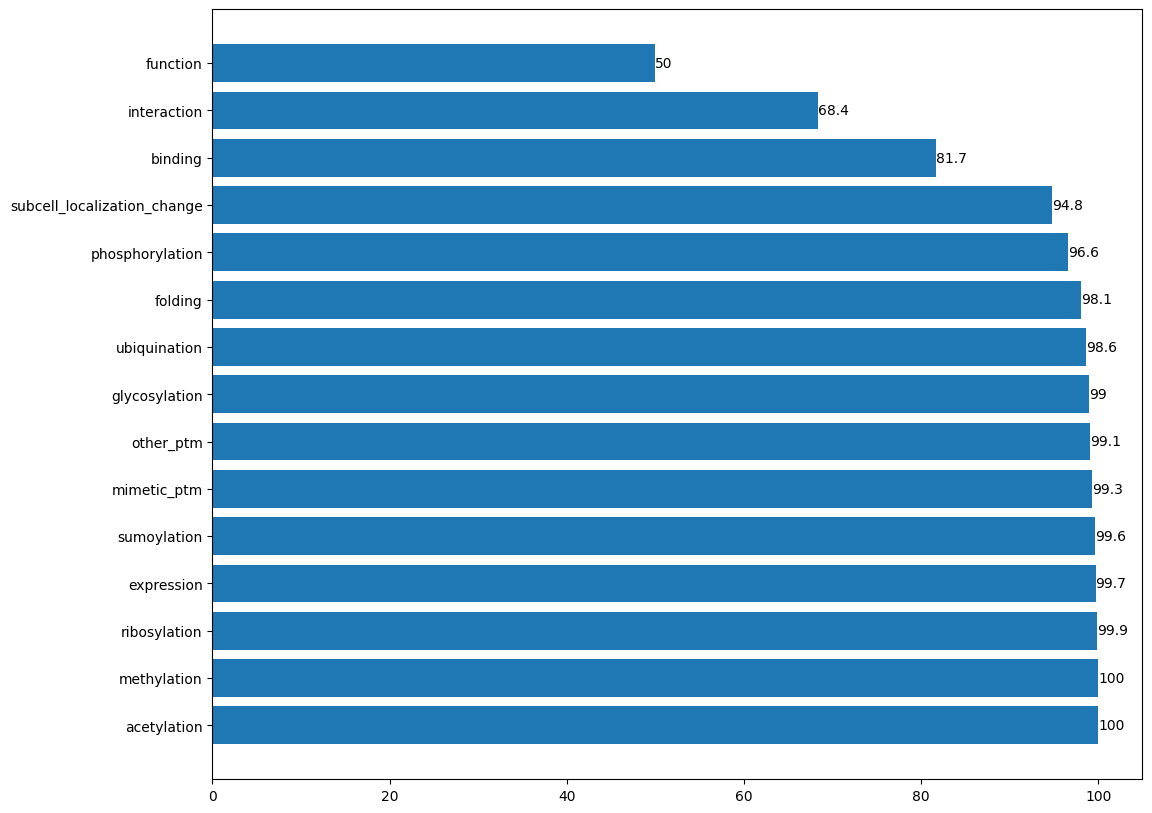

In [11]:
def plot_nas(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' : round(na_df,1)})
        fig, ax = plt.subplots(figsize=(12,10))
        bars = ax.barh(missing_data.index, missing_data['Missing Ratio %'])

        ax.bar_label(bars)
        plt.xticks()
        plt.show()
    else:
        print('No NAs found')

plot_nas(dataProtein)

In [25]:
dataProtein['acetylation']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
7995   NaN
7996   NaN
7997   NaN
7998   NaN
7999   NaN
Name: acetylation, Length: 8000, dtype: float64

## Results Analysis

In [19]:
dataFold0 = pd.read_excel('../results/Fold0_AUC_Results.xlsx')
dataFold0

Label AUC: 0 Label AUC: 1 Label AUC: 2 Label AUC: 3 Label AUC: 4  \
0       0.510693     0.510693     0.510693     0.508322     0.512156   
1       0.515684     0.515684     0.515684     0.515302     0.512581   
2       0.529244     0.529244     0.529244     0.531266     0.527779   
3       0.543587     0.543587     0.543587     0.542874     0.536638   
4       0.551538     0.551538     0.551538      0.55182     0.546229   
..           ...          ...          ...          ...          ...   
197     0.521615     0.524881     0.518942     0.548177     0.551582   
198     0.522023     0.528307     0.521765     0.554277     0.552141   
199     0.522041     0.526127     0.520539     0.552229     0.555052   
200      0.52367     0.526368     0.520154     0.548385     0.561523   
201     0.525205      0.52887     0.522861      0.55476     0.562084   

    Label AUC: 5 Label AUC: 6 Label AUC: 7 Label AUC: 8 Label AUC: 9  \
0        0.50829     0.504494          NaN     0.522147          NaN   
1       0.512496      0.51215          NaN     0.510434          NaN   
2       0.528447     0.534253          NaN     0.529368          NaN   
3       0.542076     0.556192          NaN     0.536562          NaN   
4       0.541504      0.54889          NaN     0.550186          NaN   
..           ...          ...          ...          ...          ...   
197      0.58418     0.520871          NaN     0.510668          NaN   
198      0.58168     0.525679          NaN     0.513446          NaN   
199      0.58418     0.530581          NaN     0.514716          NaN   
200     0.584729     0.520871          NaN     0.506964          NaN   
201     0.584729     0.535388          NaN     0.516223          NaN   

    Label AUC: 10 Label AUC: 11 Label AUC: 12 Label AUC: 13 Label AUC: 14  
0        0.517246      0.510649      0.495095      0.507811      0.503707  
1        0.556022       0.51495      0.513887      0.511125      0.519532  
2        0.547719        0.5271      0.542811      0.533628      0.526111  
3        0.590313      0.544005      0.540647      0.546943      0.544077  
4         0.59852      0.551728      0.538315      0.549344      0.539431  
..            ...           ...           ...           ...           ...  
197      0.521875      0.527396      0.576083      0.549703      0.487805  
198      0.529688      0.530936      0.578831      0.547775      0.510532  
199        0.5375       0.53404      0.584222      0.552966      0.510532  
200      0.529688      0.528413       0.56194       0.55452      0.521414  
201      0.521875      0.534618      0.577404      0.557549      0.521414  

[202 rows x 15 columns]

## Similarity Analysis - UniRep

In [2]:
with open('../embedding/additional_features/unirep.pkl', 'rb') as file:
    unirep = pickle.load(file)

In [10]:
fastas_mut = os.listdir('../dataset/fasta_mut')

for key, value in unirep.items():
    wt = unirep[key][0]

    fasta_present = [fasta_mut for fasta_mut in fastas_mut if key in fasta_mut]
    print(fasta_present)
    break

['1unp_A_K_8_R.fasta', '1unp_A_K_14_A.fasta', '1unp_A_K_14_Q.fasta', '1unp_A_K_14_R.fasta', '1unp_A_E_17_K.fasta', '1unp_A_K_20_Q.fasta', '1unp_A_K_20_R.fasta', '1unp_A_R_25_A.fasta', '1unp_A_R_25_C.fasta', '1unp_A_R_86_A.fasta']


In [ ]:
x = range(unirep['1unp_A'][0].shape[1])

plt.figure(figsize=(10,10))
plt.plot(x, unirep['1unp_A'][0].T)
plt.xlabel('Index')
plt.ylabel('Embedding')
plt.title('UniRep Embedding - 1UNP:A')
plt.grid(True)
plt.show()

## Similarity Analysis - Part 2

In [10]:
similarity = np.load('../embedding/additional_features/similarity.npy', allow_pickle=True)

In [11]:
len_list = 201
distribution = {}
distribution_mean = [0.0] * len_list
count_total = [0.0] * len_list


for pdb in similarity.item().keys():
    for mutation in similarity.item()[pdb].keys():
        x = range(similarity.item()[pdb][mutation][1].mean(1).shape[0])
        y = np.abs(similarity.item()[pdb][mutation][1]).mean(1)
        mut = y[int(mutation.split('_')[3]) - 1]

        center = int(mutation.split('_')[3]) - 1
        length = len(y)

        if center >= 100 and length - center >= 100:
            previous = list(y[center - 100:center])
            next = list(y[center + 1:center + 101])
        else:
            previous = list(y[max(0, center - 100):center])
            next = list(y[center + 1:min(length, center + 101)])

        zeroes_next = [0.0] * (100 - len(next))
        zeroes_previous = [0.0] * (100 - len(previous))
        
        previous_end = zeroes_previous + previous
        next_end = next + zeroes_next

        distribution[mutation] = previous_end + [mut] + next_end
        for i in range(len_list):
            if i > (len(zeroes_previous) - 1) and i < (len_list - len(zeroes_next)):
                distribution_mean[i] += distribution[mutation][i]
                count_total[i] += 1

In [12]:
mean_list = [0 if count_total[i] == 0 else distribution_mean[i] / count_total[i] for i in range(len(distribution_mean))]

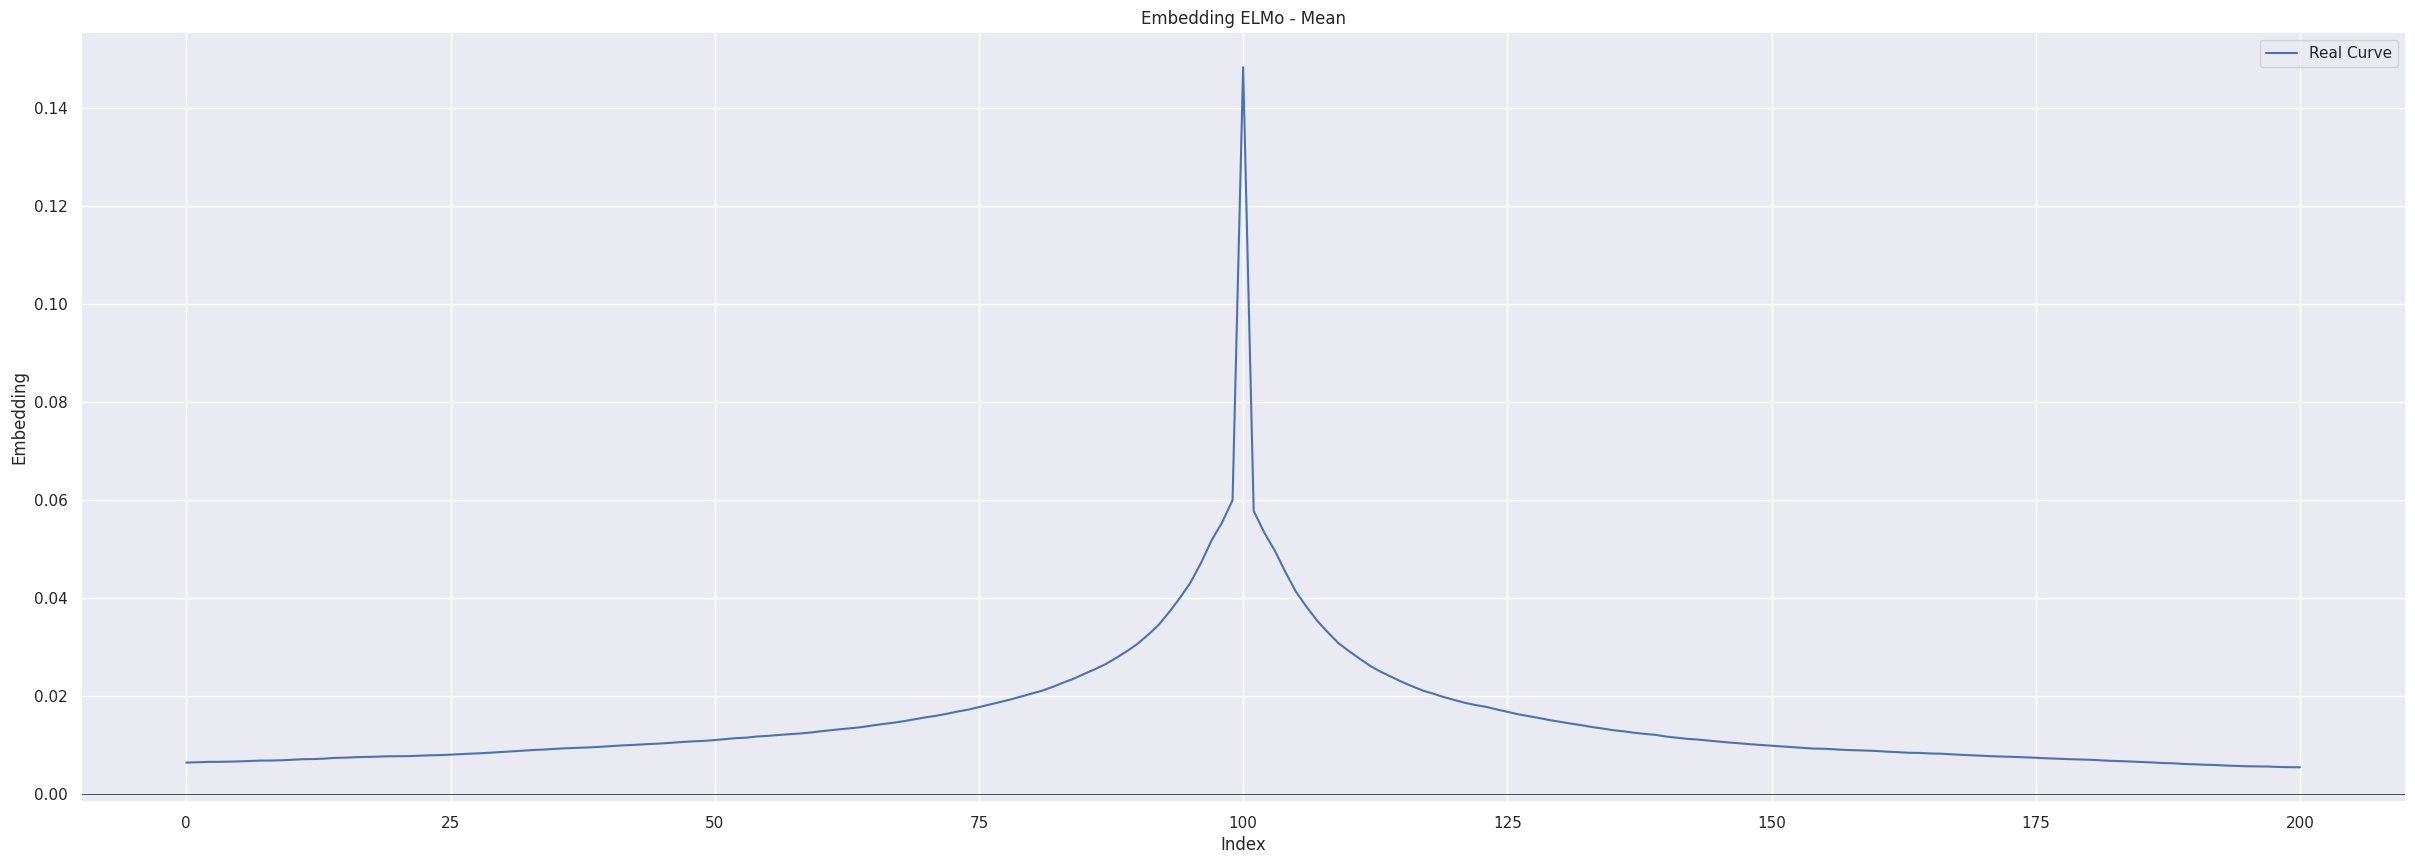

In [13]:
spl = make_interp_spline(range(len(mean_list)), mean_list)
x_smooth = np.linspace(min(range(len(mean_list))), max(range(len(mean_list))), 1000)
y_smooth = spl(x_smooth)

sns.set_theme()
plt.figure(figsize=(30,10))
plt.plot(range(len(mean_list)), mean_list, label='Real Curve')
#plt.plot(x_smooth, y_smooth, label='Smoothing Curve')
plt.axhline(0, color='black', linewidth=0.5)
plt.xlabel('Index')
plt.ylabel('Embedding')
plt.title('Embedding ELMo - Mean')
plt.legend()
plt.grid(True)
plt.show()

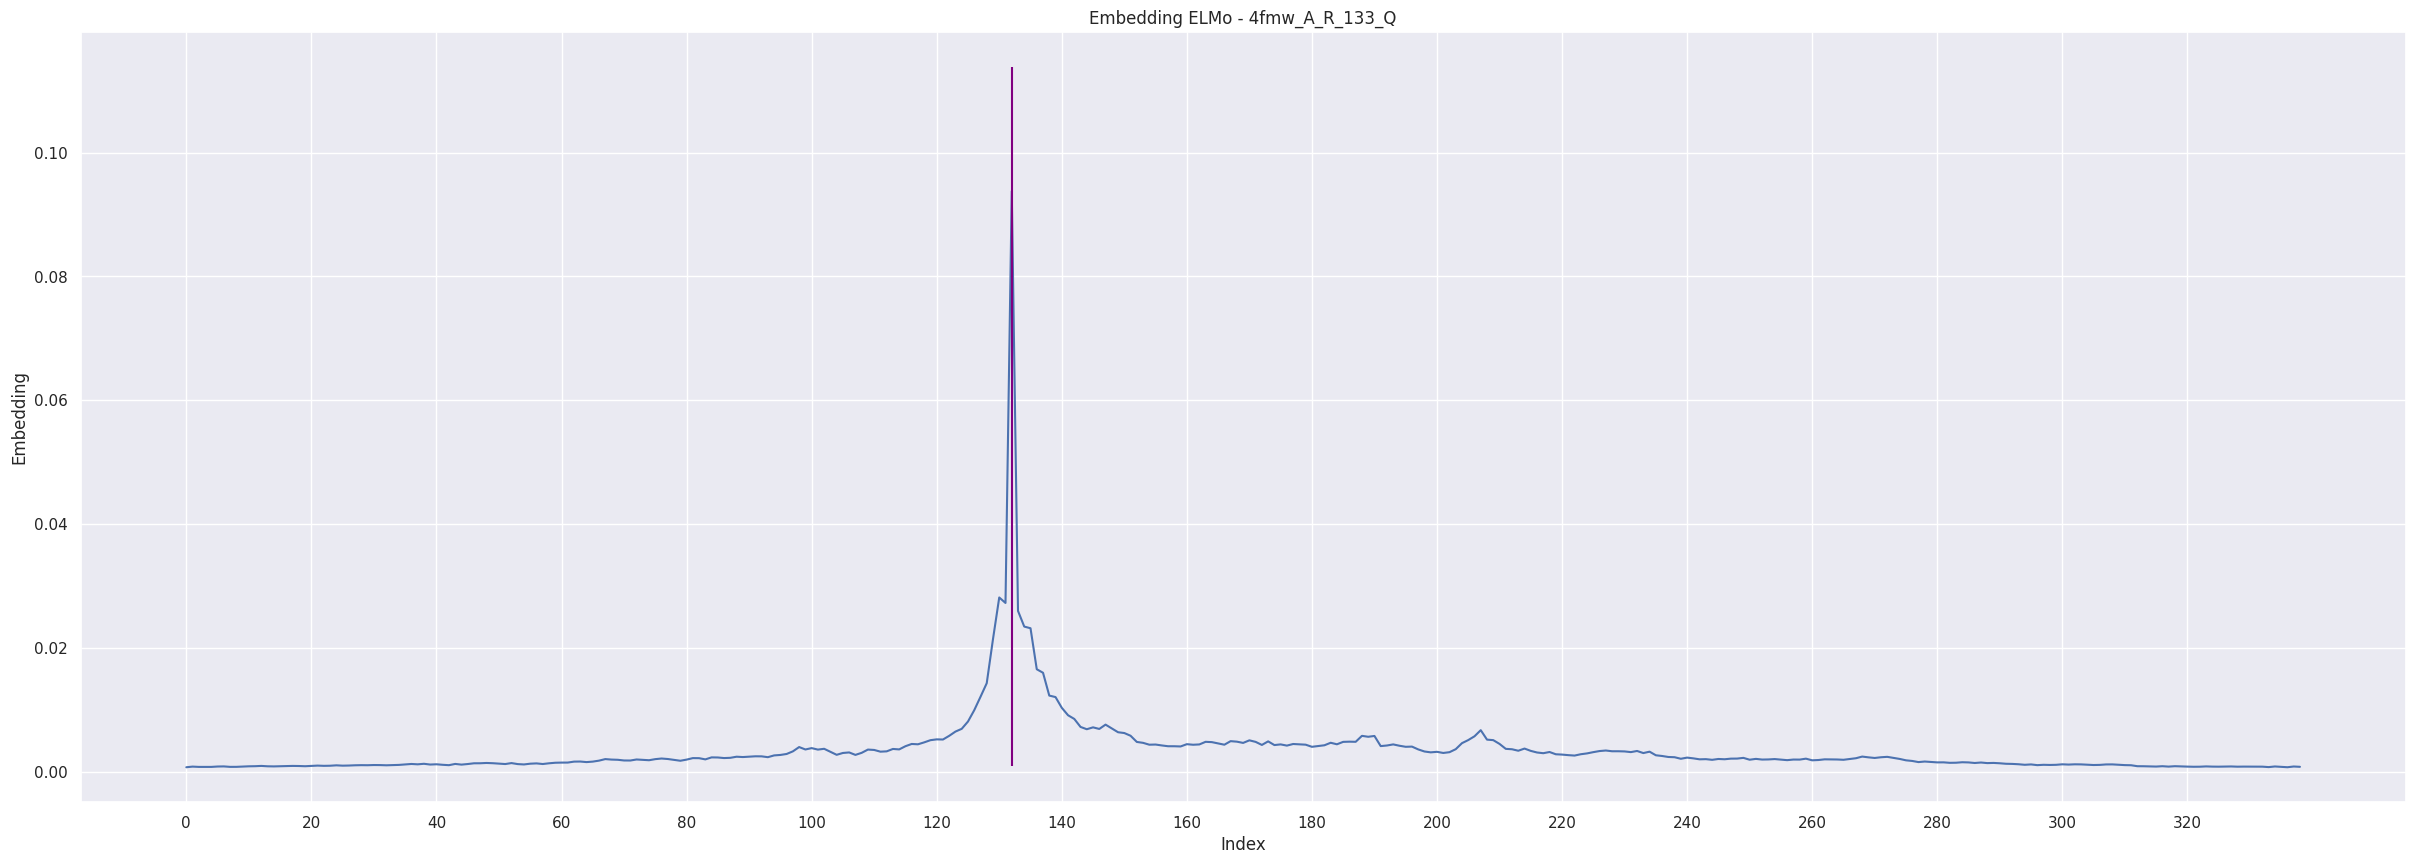

In [15]:

for key in similarity.item()['4fmw_A'].keys():
    x = range(similarity.item()['4fmw_A'][key][1].mean(1).shape[0])

    sns.set_theme()
    plt.figure(figsize=(30,10))
    plt.plot(x, np.abs(similarity.item()['4fmw_A'][key][1]).mean(1))
    plt.vlines(x=(int(key.split('_')[3]) - 1), colors='purple', ymin=0.001, ymax=(max(np.abs(similarity.item()['4fmw_A'][key][1]).mean(1))+0.02))
    plt.xlabel('Index')
    plt.ylabel('Embedding')
    plt.title(f'Embedding ELMo - {key}')
    plt.xticks(np.arange(0,similarity.item()['4fmw_A'][key][1].mean(1).shape[0], 20))
    plt.grid(True)
    plt.show()
    break

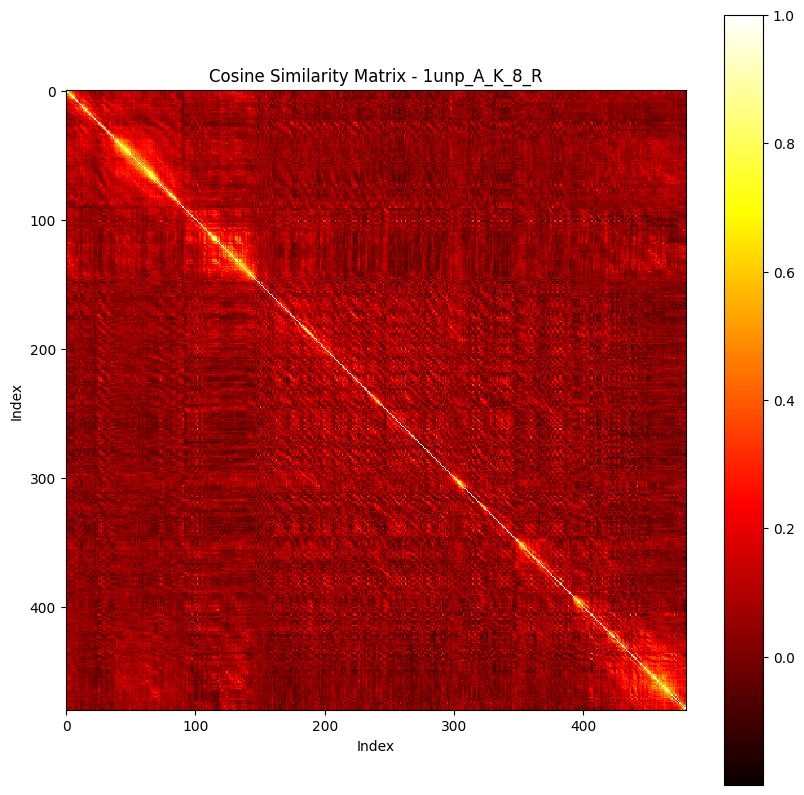

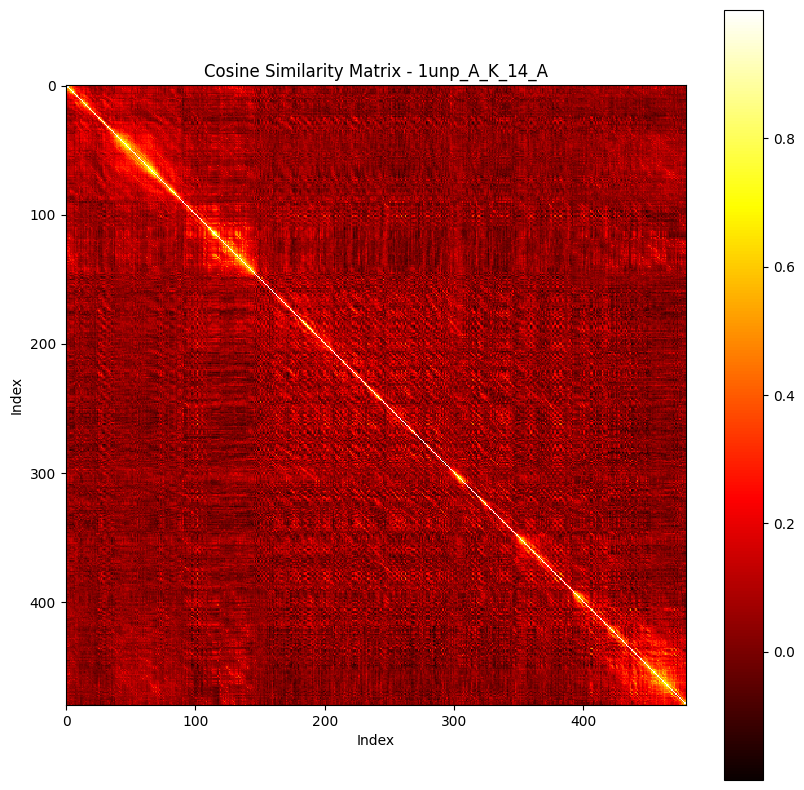

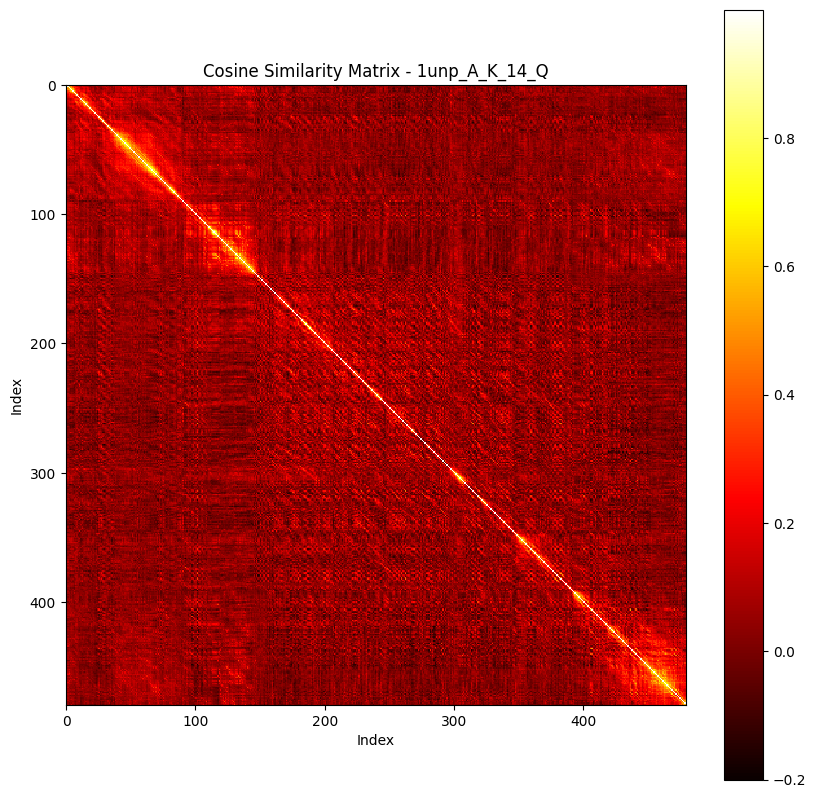

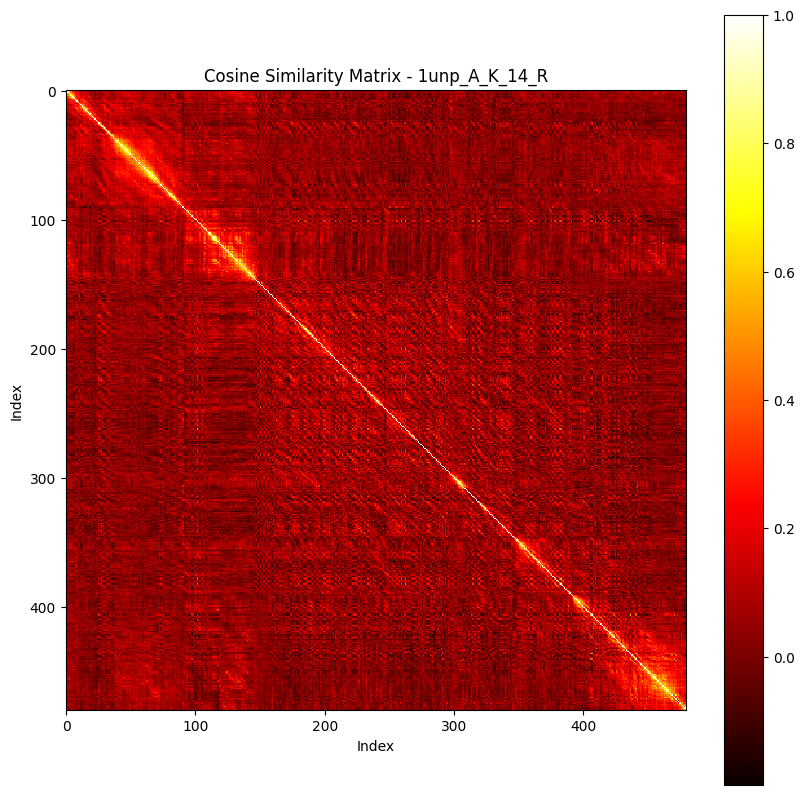

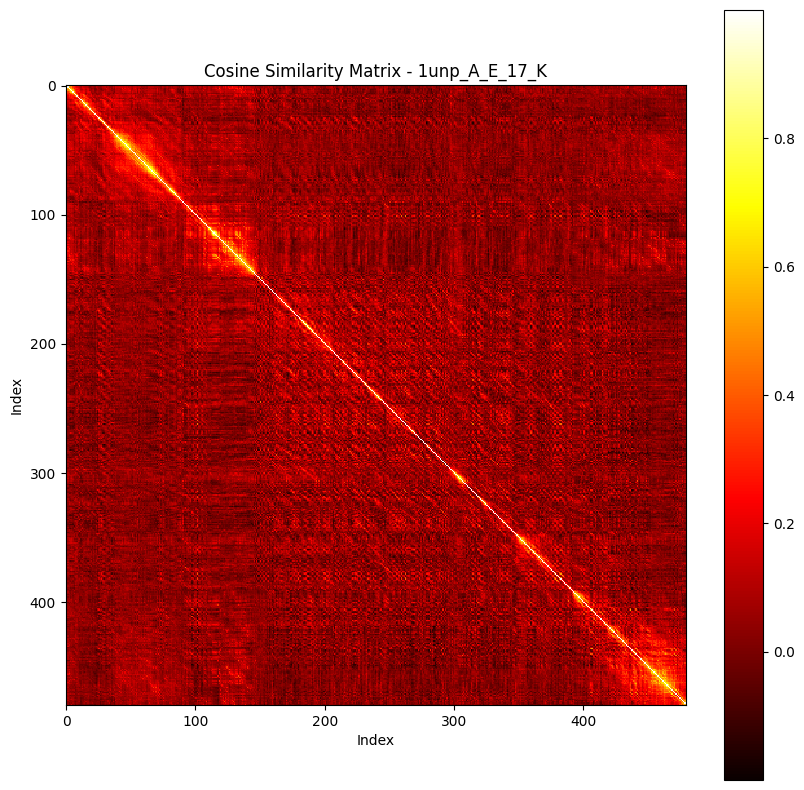

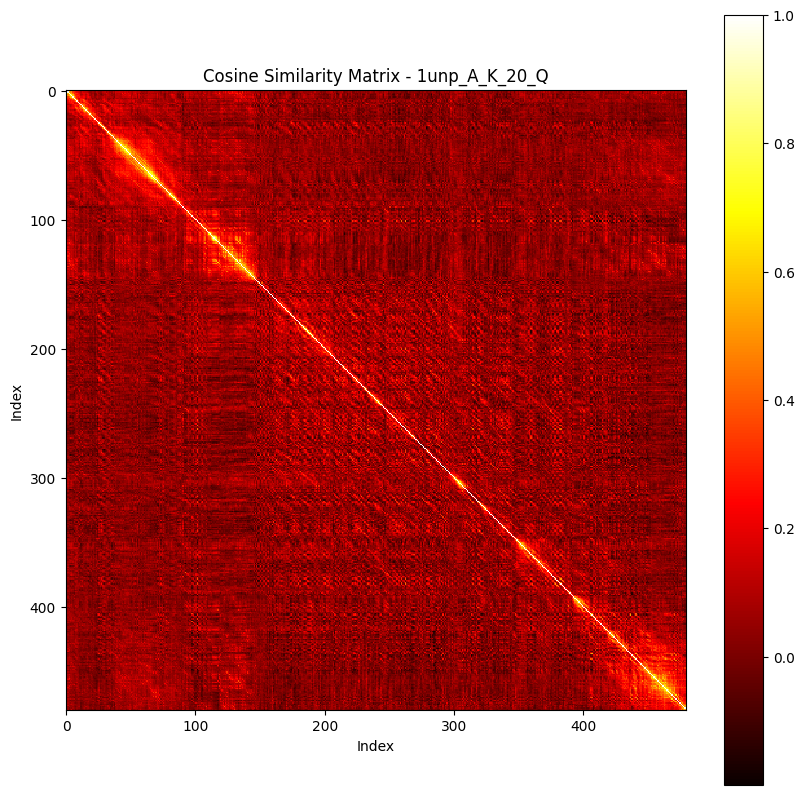

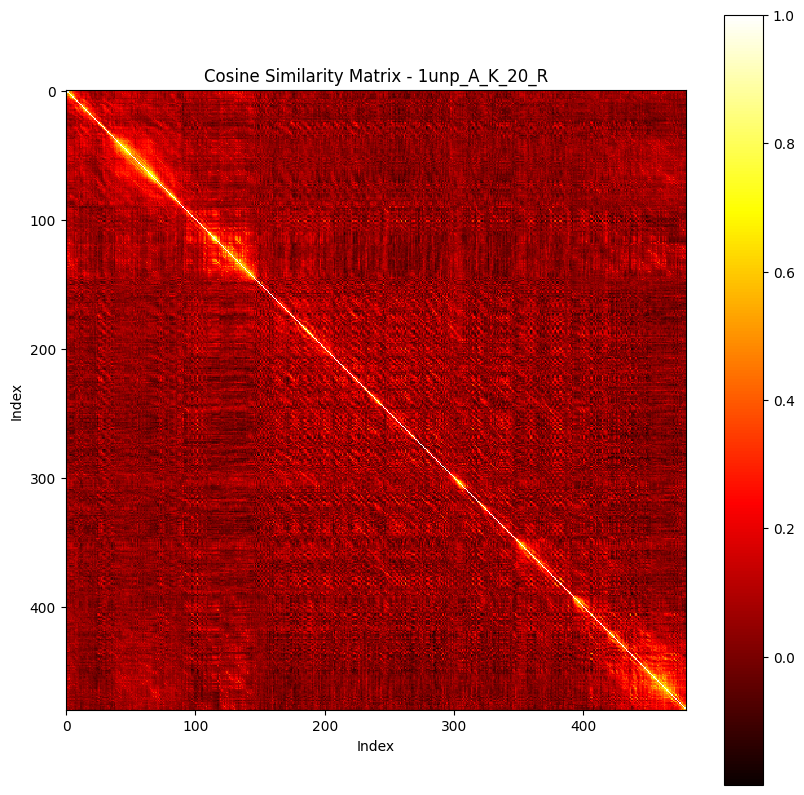

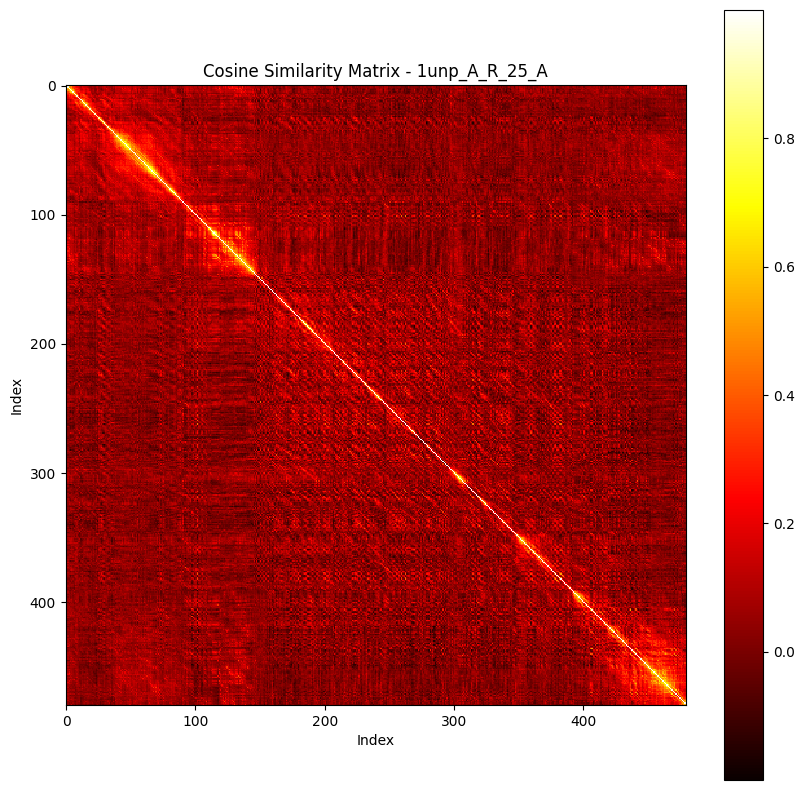

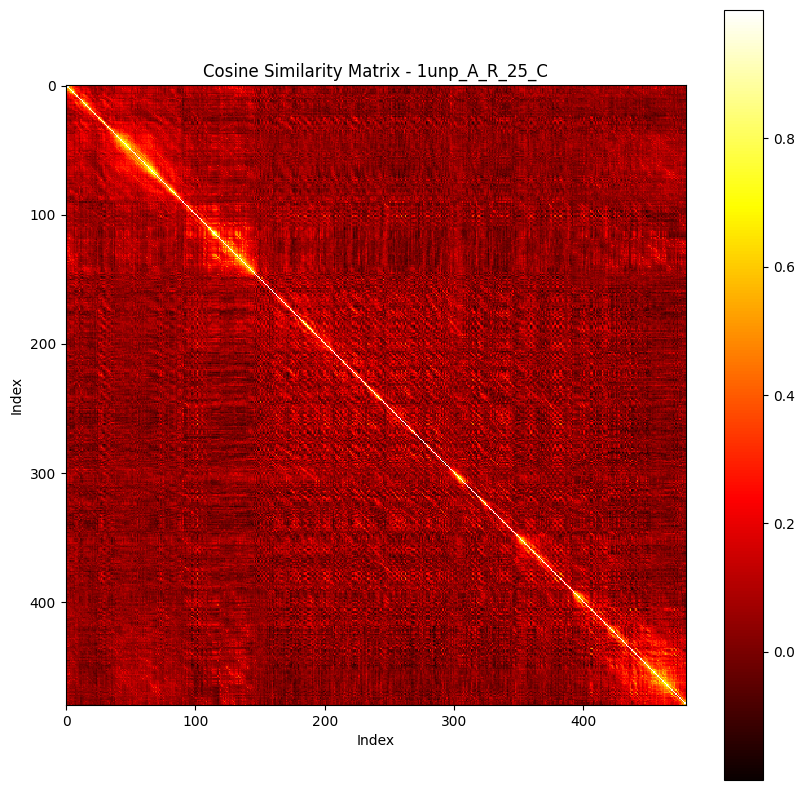

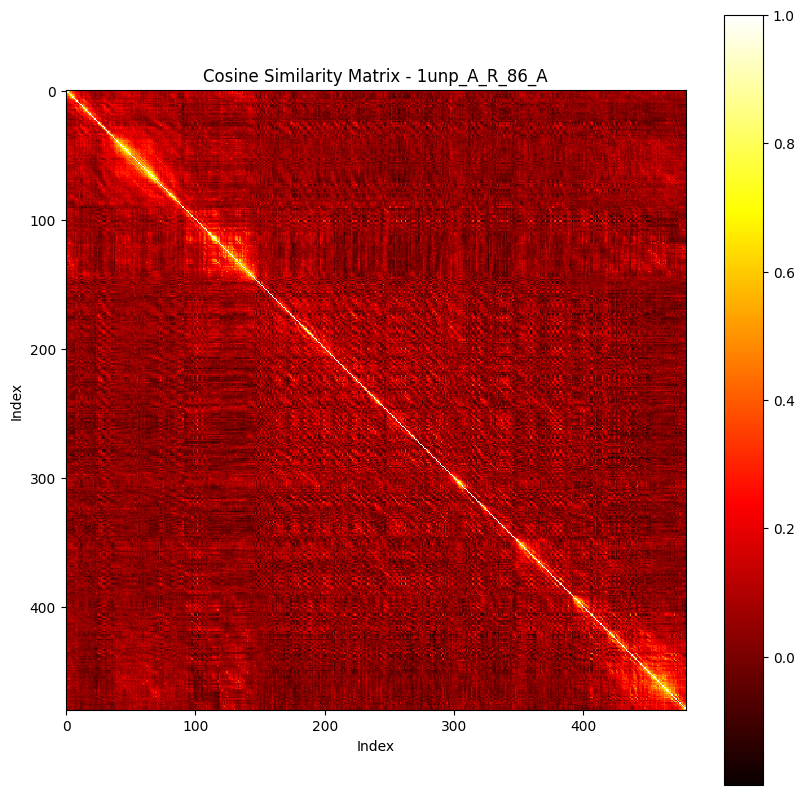

In [24]:
for key in similarity.item()['1unp_A'].keys():
    matrix_similarity = similarity.item()['1unp_A'][key][0]

    plt.figure(figsize=(10,10))
    plt.imshow(matrix_similarity, cmap='hot', interpolation='nearest')
    plt.colorbar()
    plt.title(f'Cosine Similarity Matrix - {key}')
    plt.xlabel('Index')
    plt.ylabel('Index')
    plt.show()

## Data Preprocessed UniRep

In [11]:
data_processed = np.load('../dataset/prepared/data_processed_unirep.npy', allow_pickle=True)
data_processed[0][0]

array([ 2.8433278e-06, -4.4474453e-03, -1.2137592e-03, ...,
        7.0972741e-04, -1.9440427e-03, -1.4460666e-02], dtype=float32)

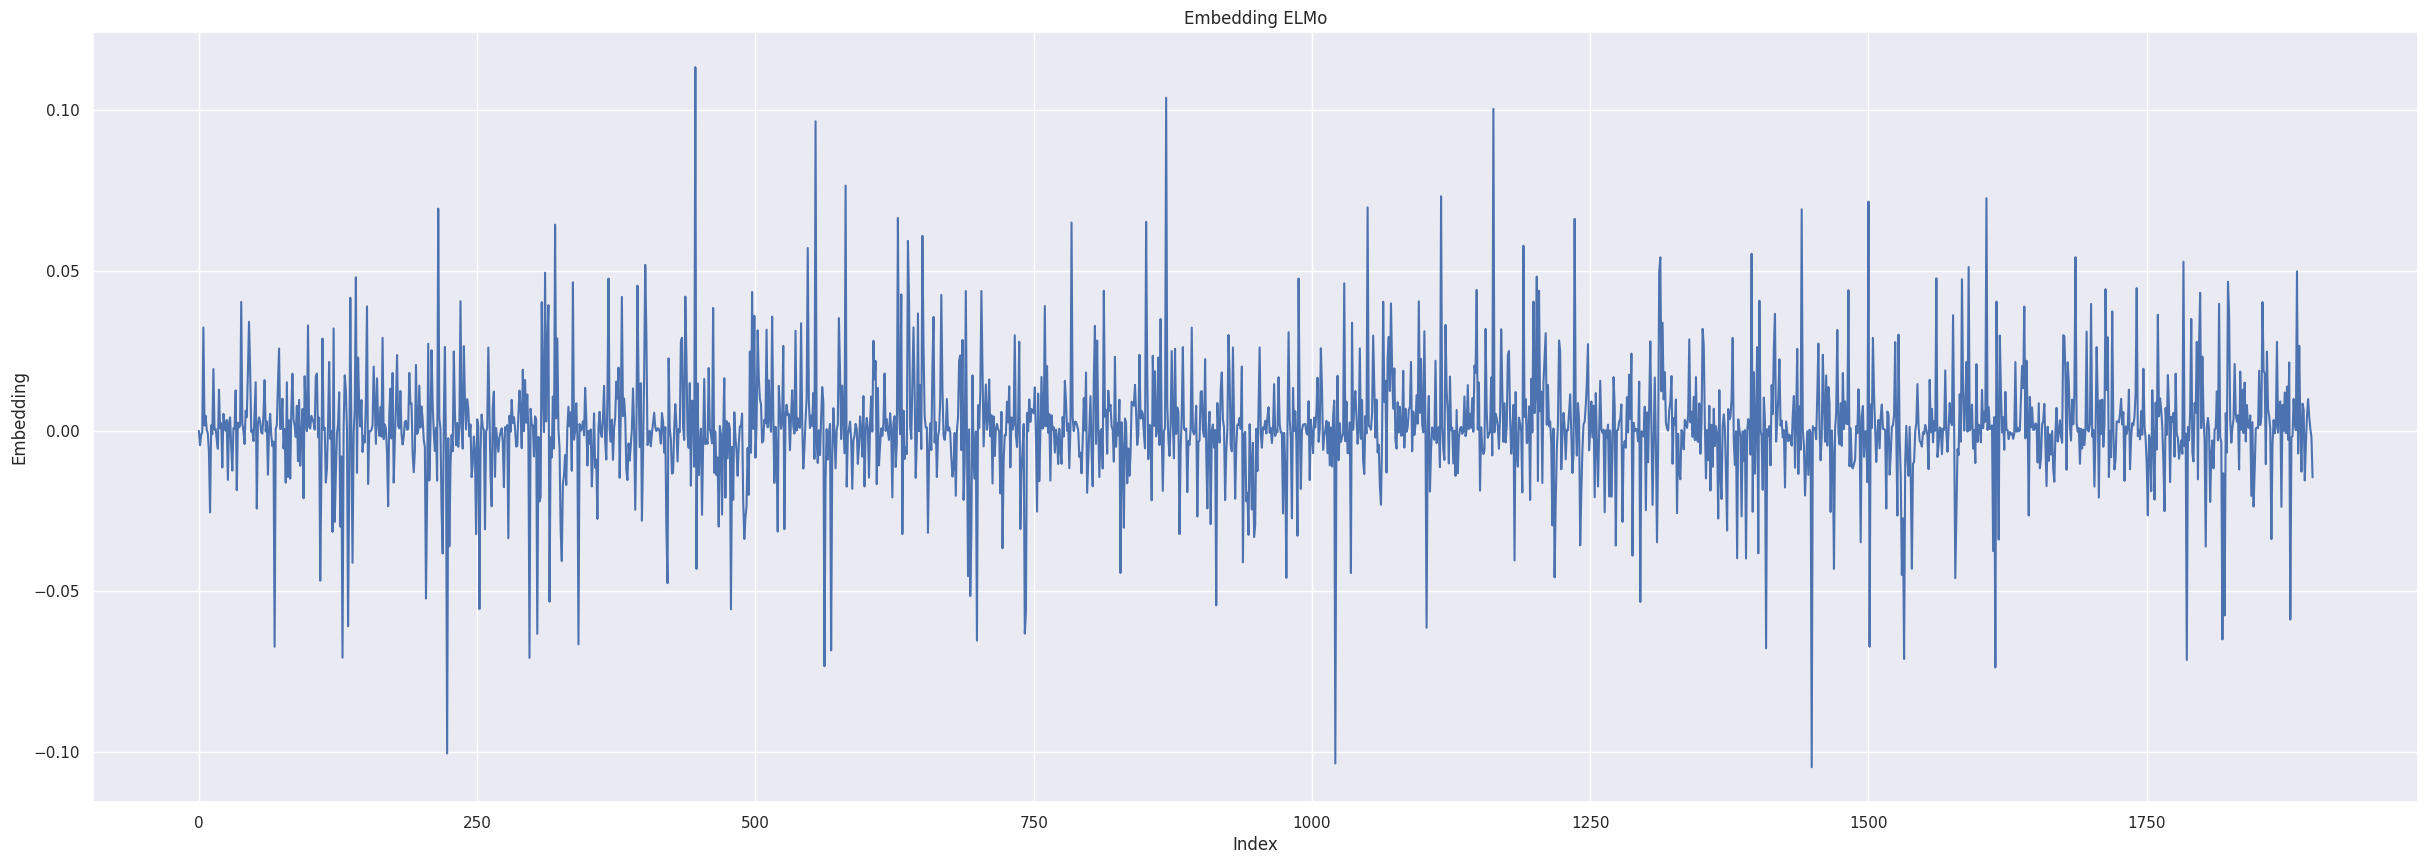

In [12]:
for key in data_processed:
    x = range(key.shape[1])

    sns.set_theme()
    plt.figure(figsize=(30,10))
    plt.plot(x, key[0])
    #plt.vlines(x=(int(key.split('_')[3]) - 1), colors='purple')
    plt.xlabel('Index')
    plt.ylabel('Embedding')
    plt.title(f'Embedding ELMo')
    #plt.xticks(np.arange(0,similarity.item()['1bmo_A'][key][1].mean(1).shape[0], 20))
    plt.grid(True)
    plt.show()
    break

## Dataset from Nature

In [2]:
dataSNV = pd.read_csv('../dataset/SNV.tds', sep='\t')
dataSNV.head()

Uniprot code  Mutation PDB code Oligomerization  state   BU Chain  mut pos  \
0          NaN       NaN      NaN                    NaN  NaN   NaN      NaN   
1       Q8TBZ6     133.0     4fmw              MONOMERIC  1.0     A    133.0   
2       Q9NP97      71.0     2hz5                DIMERIC  1.0     A     71.0   
3       Q9UBK8     360.0     2qtz              MONOMERIC  1.0     A    333.0   
4       P26045     763.0     2b49              MONOMERIC  1.0     A    763.0   

  wildtype mutant Variant Effect  ...    Prediction.2 PROVEAN    Prediction.3  \
0      NaN    NaN            NaN  ...  < tr > =  -1.7     NaN  < tr > =  -2.5   
1      ARG    GLN        Neutral  ...         Neutral   -3,68     Deleterious   
2      ILE    PHE        Neutral  ...     Deleterious   -3,89     Deleterious   
3      LEU    VAL        Neutral  ...     Deleterious   -1,76         Neutral   
4      ASP    ASN        Neutral  ...         Neutral   -1,34         Neutral   

    ANN    Prediction.4 PNN.dis PNN.neut Prediction.5 SNPMuSiC Prediction.6  
0   NaN  < tr > =  0.75       %        %          NaN      NaN    <tr>=0.32  
1  0,41         Neutral    0,12     0,88      Neutral     0,05      Neutral  
2  0,78              ex    0,55     0,45  Deleterious     0,53  Deleterious  
3  0,86     Deleterious    0,26     0,74      Neutral     0,35      Neutral  
4  0,42         Neutral    0,14     0,86      Neutral    -0,28      Neutral  

[5 rows x 25 columns]

In [3]:
def merge_columns(row):
    values = [val for val in [row['PDB code'], row['Chain']] if pd.notna(val)]
    return ':'.join(values)

dataSNV["pdb_id"] = dataSNV.apply(merge_columns, axis =1)

In [4]:
dataSNV.rename(columns={'Uniprot code': 'uniprot_id', 
                        'Mutation': 'position', 'mutant': 'mutation', 
                        'Variant Effect': 'label'}, inplace=True)

In [5]:
dataSNV.drop(columns=['mut pos', 'Oligomerization  state', 'PDB code',
                      'BU', 'Chain', 'Solvent  Accessibility', 
                      'Prediction', 'PoPMuSiC ΔΔG', 'Prediction.1', 
                      'HoTMuSiC ΔTm', 'Prediction.2', 'PROVEAN', 
                      'Prediction.3', 'ANN','Prediction.4', 'PNN.dis', 
                      'PNN.neut', 'Prediction.5', 'SNPMuSiC','Prediction.6'], inplace=True)

dataSNV.drop(labels=0, axis=0, inplace=True)

In [6]:
mapping = {'ALA': 'A', 'ARG': 'R', 'ASN': 'N', 'ASP': 'D', 'CYS': 'C', 'GLN': 'Q', 
           'GLU': 'E', 'GLY': 'G', 'HIS': 'H', 'ILE': 'I', 'LEU': 'L', 'LYS': 'K', 
           'MET': 'M', 'PHE': 'F', 'PRO': 'P', 'SER': 'S', 'THR': 'T', 'TRP': 'W', 
           'TYR': 'Y', 'VAL': 'V'}

dataSNV.replace({'wildtype': mapping, 'mutation': mapping}, inplace=True)

In [7]:
set(dataSNV['label'])

{'Deleterious', 'Neutral'}

In [8]:
dataSNV['position'] = dataSNV['position'].apply(lambda x: int(x))

In [9]:
dataSNV = dataSNV.reindex(columns=['uniprot_id', 'wildtype', 'position', 
                                   'mutation', 'pdb_id', 'label'])
dataSNV

uniprot_id wildtype  position mutation  pdb_id        label
1        Q8TBZ6        R       133        Q  4fmw:A      Neutral
2        Q9NP97        I        71        F  2hz5:A      Neutral
3        Q9UBK8        L       360        V  2qtz:A      Neutral
4        P26045        D       763        N  2b49:A      Neutral
5        Q96LJ7        T       241        I  2qq5:A      Neutral
...         ...      ...       ...      ...     ...          ...
5298     Q9Y5Y6        G       827        R  3ncl:A  Deleterious
5299     Q9Y606        R       144        W  4j37:A  Deleterious
5300     P02671        C       184        W  1fzc:A  Deleterious
5301     P02675        L       202        Q  1fzc:B  Deleterious
5302     P02675        T       407        K  1fzc:B  Deleterious

[5302 rows x 6 columns]

In [10]:
dataSNV.to_csv('../dataset/SNV.tsv', sep="\t")

In [2]:
dataSNV = pd.read_csv('../dataset/SNV.tsv', sep='\t')
dataSNV.head()

Unnamed: 0 uniprot_id wildtype  position mutation  pdb_id    label
0           1     Q8TBZ6        R       133        Q  4fmw:A  Neutral
1           2     Q9NP97        I        71        F  2hz5:A  Neutral
2           3     Q9UBK8        L       360        V  2qtz:A  Neutral
3           4     P26045        D       763        N  2b49:A  Neutral
4           5     Q96LJ7        T       241        I  2qq5:A  Neutral

In [4]:
dataSNV['label'].value_counts()

label
Deleterious    4001
Neutral        1301
Name: count, dtype: int64

# Analysis Results Metrics

In [6]:
data = pd.read_excel('../results/trials_0/Fold0_AUC_Results.xlsx')
data

Label AUC: 0       Label AUC: 1       Label AUC: 2  \
0            0.678281                NaN                NaN   
1            0.718927                NaN                NaN   
2            0.736633                NaN                NaN   
3            0.757852                NaN                NaN   
4            0.763739                NaN                NaN   
5            0.770801                NaN                NaN   
6            0.772442                NaN                NaN   
7             0.77476                NaN                NaN   
8            0.787224                NaN                NaN   
9            0.795082                NaN                NaN   
10                NaN                NaN                NaN   
11  Label Test AUC: 0  Label Test AUC: 1  Label Test AUC: 2   
12           0.690022                NaN                NaN   
13           0.701566                NaN                NaN   
14            0.70011                NaN                NaN   
15           0.711512                NaN                NaN   
16           0.690194                NaN                NaN   
17           0.693471                NaN                NaN   
18            0.69176                NaN                NaN   
19           0.705559                NaN                NaN   
20           0.700266                NaN                NaN   
21           0.707732                NaN                NaN   

         Label AUC: 3       Label AUC: 4       Label AUC: 5  \
0                 NaN                NaN                NaN   
1                 NaN                NaN                NaN   
2                 NaN                NaN                NaN   
3                 NaN                NaN                NaN   
4                 NaN                NaN                NaN   
5                 NaN                NaN                NaN   
6                 NaN                NaN                NaN   
7                 NaN                NaN                NaN   
8                 NaN                NaN                NaN   
9                 NaN                NaN                NaN   
10                NaN                NaN                NaN   
11  Label Test AUC: 3  Label Test AUC: 4  Label Test AUC: 5   
12                NaN                NaN                NaN   
13                NaN                NaN                NaN   
14                NaN                NaN                NaN   
15                NaN                NaN                NaN   
16                NaN                NaN                NaN   
17                NaN                NaN                NaN   
18                NaN                NaN                NaN   
19                NaN                NaN                NaN   
20                NaN                NaN                NaN   
21                NaN                NaN                NaN   

         Label AUC: 6       Label AUC: 7       Label AUC: 8  \
0                 NaN                NaN                NaN   
1                 NaN                NaN                NaN   
2                 NaN                NaN                NaN   
3                 NaN                NaN                NaN   
4                 NaN                NaN                NaN   
5                 NaN                NaN                NaN   
6                 NaN                NaN                NaN   
7                 NaN                NaN                NaN   
8                 NaN                NaN                NaN   
9                 NaN                NaN                NaN   
10                NaN                NaN                NaN   
11  Label Test AUC: 6  Label Test AUC: 7  Label Test AUC: 8   
12                NaN                NaN                NaN   
13                NaN                NaN                NaN   
14                NaN                NaN                NaN   
15                NaN                NaN                NaN   
16                NaN                N

In [9]:
import openpyxl

def estrai_valori_da_excel(file_path):
    workbook = openpyxl.load_workbook(file_path)
    sheet = workbook.active
    
    trovata_riga = False
    valori_successivi = []
    
    # Scorre le righe del foglio
    for row in sheet.iter_rows():
        for cell in row:
            if cell.value == "Label Test AUC: 0":
                trovata_riga = True
            elif trovata_riga and cell.column == 1:
                valori_successivi.append(cell.value)
        
    return valori_successivi

valori = estrai_valori_da_excel('../results/trials_0/Fold0_AUC_Results.xlsx')
valori

[0.6900218101042621,
 0.7015661496036457,
 0.7001102122495759,
 0.7115117958131826,
 0.6901935040950775,
 0.6934713659421453,
 0.6917599175336226,
 0.7055592632518625,
 0.7002663876650468,
 0.7077317457154112]

In [10]:
np.mean(valori)

0.6992192151973832

In [11]:
valori = estrai_valori_da_excel('../results/trials_old/Fold0_AUC_Results.xlsx')
valori

[0.4911819696426392,
 0.4870797097682953,
 0.4965144991874695,
 0.4951653778553009,
 0.4870847761631012,
 0.4885351955890656,
 0.4941211342811584,
 0.4883252084255219,
 0.4961093068122864,
 0.4927464127540588,
 0.5004717111587524,
 0.5024752616882324,
 0.4996433258056641,
 0.4981832206249237,
 0.5061781406402588,
 0.5019313097000122,
 0.5079057812690735,
 0.5104891657829285,
 0.513363778591156,
 0.5090767741203308,
 0.5103955268859863,
 0.5092707276344299,
 0.5122725367546082,
 0.5129837989807129,
 0.5154038071632385,
 0.5121612548828125,
 0.5167247653007507,
 0.5153459310531616,
 0.5185947418212891,
 0.5151639580726624,
 0.5306175947189331,
 0.5208931565284729,
 0.5201600790023804,
 0.5186359882354736,
 0.5160810947418213,
 0.5162093639373779,
 0.5165426731109619,
 0.510731041431427,
 0.5221236944198608,
 0.519514262676239,
 0.5228036642074585,
 0.526267409324646,
 0.520151674747467,
 0.5212395191192627,
 0.5188997387886047,
 0.5286356806755066,
 0.5288651585578918,
 0.523728251457214

In [12]:
np.mean(valori)

0.515411736369133

## Analysis ProteinBERT

In [7]:
with open('../embedding/additional_features/protbert.pkl', 'rb') as file:
    protbert = pickle.load(file)

In [9]:
for key, value in protbert.items():
    for tupla in value:
        print(tupla[1].shape)
        break

(341, 1562)
(98, 1562)
(915, 1562)
(315, 1562)
(252, 1562)
(505, 1562)
(401, 1562)
(371, 1562)
(306, 1562)
(476, 1562)
(319, 1562)
(319, 1562)
(425, 1562)
(328, 1562)
(490, 1562)
(642, 1562)
(280, 1562)
(361, 1562)
(883, 1562)
(279, 1562)
(318, 1562)
(318, 1562)
(626, 1562)
(594, 1562)
(320, 1562)
(537, 1562)
(469, 1562)
(279, 1562)
(291, 1562)
(291, 1562)
(753, 1562)
(304, 1562)
(364, 1562)
(364, 1562)
(690, 1562)
(312, 1562)
(457, 1562)
(364, 1562)
(492, 1562)
(712, 1562)
(224, 1562)
(224, 1562)
(421, 1562)
(284, 1562)
(356, 1562)
(247, 1562)
(837, 1562)
(837, 1562)
(388, 1562)
(515, 1562)
(499, 1562)
(388, 1562)
(367, 1562)
(367, 1562)
(367, 1562)
(367, 1562)
(297, 1562)
(531, 1562)
(268, 1562)
(924, 1562)
(144, 1562)
(149, 1562)
(519, 1562)
(337, 1562)
(440, 1562)
(749, 1562)
(263, 1562)
(1172, 1562)
(220, 1562)
(651, 1562)
(535, 1562)
(494, 1562)
(772, 1562)
(949, 1562)
(742, 1562)
(563, 1562)
(995, 1562)
(645, 1562)
(1027, 1562)
(1524, 1562)
(137, 1562)
(293, 1562)
(275, 1562)
(4

In [14]:
data_protein = np.load('../dataset/prepared/data_processed.npy', allow_pickle=True)

(51, 1562)


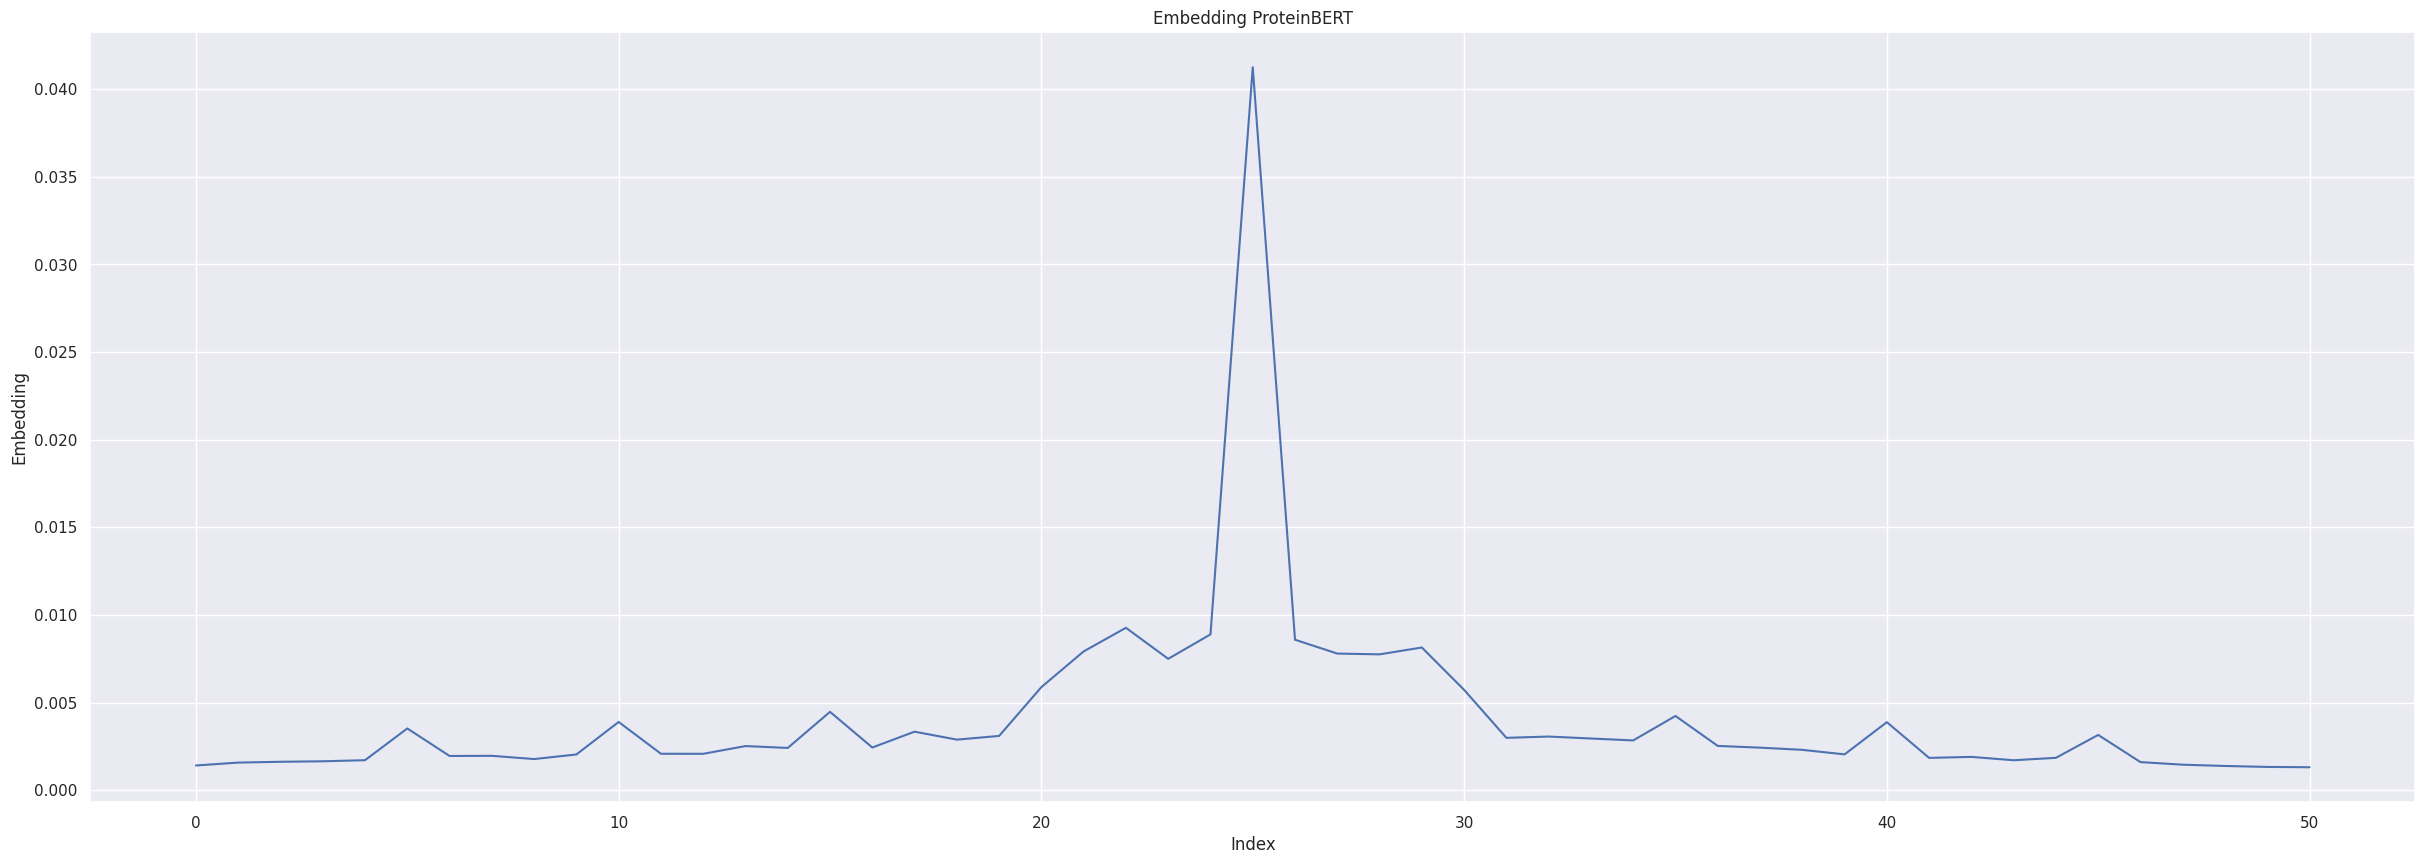

In [23]:
for key in data_protein:
    print(key.shape)
    x = range(key.shape[0])

    sns.set_theme()
    plt.figure(figsize=(30,10))
    plt.plot(x, np.abs(key).mean(1))
    #plt.vlines(x=(int(key.split('_')[3]) - 1), colors='purple')
    plt.xlabel('Index')
    plt.ylabel('Embedding')
    plt.title(f'Embedding ProteinBERT')
    #plt.xticks(np.arange(0,similarity.item()['1bmo_A'][key][1].mean(1).shape[0], 20))
    plt.grid(True)
    plt.show()
    break